# Customer Behavior Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

import multiprocessing
%matplotlib inline

## Load data

In [2]:
data = pd.read_excel('C:/Users/LeTrongTinh/Desktop/data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.0,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531.0,2
top,9661-ACXBS,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11.0,5174


In [67]:
df = data.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_null = (df[df['TotalCharges'] == ' '])
df_null.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df_null['TotalCharges'] = pd.to_numeric(df_null['TotalCharges'],errors='coerce')
df_null[['TotalCharges', 'Churn']]

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TotalCharges,Churn
488,NaN,No
753,NaN,No
936,NaN,No
1082,NaN,No
1340,NaN,No
3331,NaN,No
3826,NaN,No
4380,NaN,No
5218,NaN,No
6670,NaN,No


In [9]:
df_null['TotalCharges'] = df_null['TotalCharges'].fillna(0).astype(float)

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_null[['TotalCharges', 'Churn']]

,TotalCharges,Churn
488,0.0,No
753,0.0,No
936,0.0,No
1082,0.0,No
1340,0.0,No
3331,0.0,No
3826,0.0,No
4380,0.0,No
5218,0.0,No
6670,0.0,No


In [68]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [69]:
df['TotalCharges'] = df['TotalCharges'].fillna(0).astype(float)

In [70]:
df.head(489)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [71]:
df[['tenure','MonthlyCharges', 'TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = scaler = MinMaxScaler()

In [72]:
df['tenure'] = scaler.fit_transform(df['tenure'])

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings

In [73]:
df['TotalCharges'] = scaler.transform(df['TotalCharges'])
df['MonthlyCharges'] = scaler.transform(df['MonthlyCharges'])

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [74]:
df[['tenure','MonthlyCharges', 'TotalCharges']].head(5)

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.414583,0.414583
1,0.472222,0.790972,26.243056
2,0.027778,0.747917,1.502083
3,0.625000,0.587500,25.565972
4,0.027778,0.981944,2.106250


In [ ]:
df[['tenure','MonthlyCharges', 'TotalCharges']].head(5)

In [78]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [79]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.414583,0.414583,0
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.790972,26.243056,0
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.747917,1.502083,1
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.587500,25.565972,0
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.981944,2.106250,1


In [80]:
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [81]:
new_df = pd.get_dummies(df[col])
new_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [82]:
new_df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']] = df[['tenure','MonthlyCharges', 'TotalCharges','Churn']]

In [83]:
new_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0.013889,0.414583,0.414583,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,0,1,0.472222,0.790972,26.243056,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0.027778,0.747917,1.502083,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0.625000,0.587500,25.565972,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0.027778,0.981944,2.106250,1


In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
train = new_df.sample(frac=0.8,random_state=200)
test = new_df.drop(train.index)
print(train.shape, test.shape)

(5634, 46) (1409, 46)


In [101]:
y_train = train['Churn']
X_train = train.drop('Churn', axis= 1)
y_test = test['Churn']
X_test = test.drop('Churn', axis= 1)

In [102]:
knn = KNeighborsClassifier()

In [104]:
model = knn.fit(X_train, y_train)

In [105]:
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.87      0.86      0.86      1067
          1       0.58      0.58      0.58       342

avg / total       0.80      0.80      0.80      1409



In [106]:
from sklearn.naive_bayes import MultinomialNB

In [107]:
nb = MultinomialNB()
model2 = nb.fit(X_train, y_train)

In [108]:
predicted2 = model2.predict(X_test)
print(classification_report(y_test, predicted2))

             precision    recall  f1-score   support

          0       0.89      0.74      0.81      1067
          1       0.47      0.73      0.57       342

avg / total       0.79      0.74      0.75      1409



In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)

In [98]:
predicted3 = model3.predict(X_test)
print(classification_report(y_test, predicted3))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1067
          1       0.60      0.46      0.52       342

avg / total       0.78      0.79      0.78      1409



In [99]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=2)

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


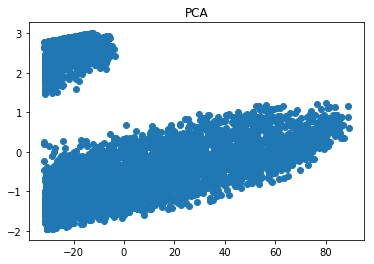

In [133]:
fig1, ax1 = plt.subplots()

X_r = pca.fit_transform(X_train)
ax1.scatter(X_r[:, 0], X_r[:, 1])
ax1.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

[]

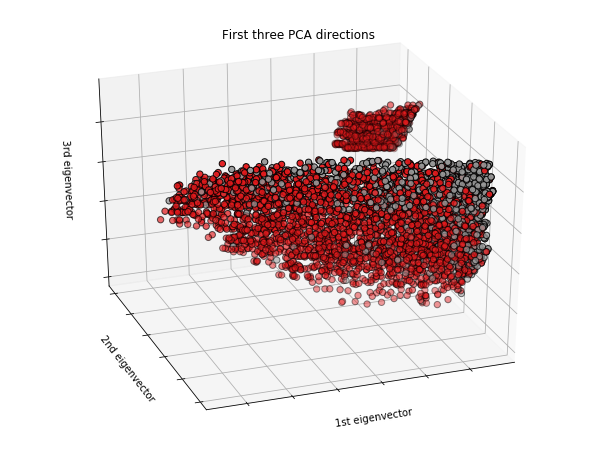

In [129]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])